In [1]:
import quasar

In [2]:
backend = quasar.QuasarSimulatorBackend()
nmeasurement = 10000

In [3]:
circuit = quasar.Circuit(N=2).Ry(0,theta=0.1).Ry(1, theta=-0.2).CZ(0,1).Ry(1, theta=+0.2).CX(1,0)
print(circuit)

T   : |0 |1|2 |3|
                 
|0> : -Ry-@----X-
          |    | 
|1> : -Ry-Z-Ry-@-

T   : |0 |1|2 |3|


In [4]:
I, X, Y, Z = quasar.Pauli.IXYZ()
pauli = I + Z[0] + 2.0 * Z[1] + 3.0 * Z[0] * Z[1]
print(pauli)

+1.0*I
+1.0*Z0
+2.0*Z1
+3.0*Z0*Z1


## Derivatives

In [5]:
value = quasar.run_observable_expectation_value(
    backend, circuit, pauli, nmeasurement=nmeasurement)
print(value)

6.9277999999999995


In [6]:
gradient = quasar.run_observable_expectation_value_gradient(
        backend, circuit, pauli, nmeasurement=nmeasurement)
print(gradient)

[-1.531   0.0952 -0.0396]


In [7]:
gradient = quasar.run_observable_expectation_value_gradient(
        backend, circuit, pauli, param_indices=[1,2], nmeasurement=nmeasurement)
print(gradient)

[ 0.0166 -0.0076]


In [8]:
hessian = quasar.run_observable_expectation_value_hessian(
        backend, circuit, pauli, nmeasurement=nmeasurement)
print(hessian)

[[-16.2878   0.27    -0.3394]
 [  0.27   -11.9224 -11.857 ]
 [ -0.3394 -11.857  -11.9068]]


In [9]:
hessian = quasar.run_observable_expectation_value_hessian(
        backend, circuit, pauli, param_indices1=[1,2], param_indices2=[0,1], nmeasurement=nmeasurement)
print(hessian)

[[  0.3768 -11.9126]
 [ -0.288  -11.873 ]]


In [10]:
hessian2 = quasar.run_observable_expectation_value_hessian_selected(
    backend, circuit, pauli, param_index_pairs=[(0,1), (1,0), (1,1)], nmeasurement=nmeasurement)
print(hessian2)

[  0.253    0.253  -11.9222]


In [11]:
pauli_expectation = quasar.run_observable_expectation_value_gradient_pauli_contraction(
    backend, circuit, pauli, param_indices=[1,2], param_coefs=[1.0, 2.0], nmeasurement=nmeasurement)
print(pauli_expectation)

+0.0*I
+0.0798*Z0
+0.059199999999999996*Z1
-0.0013999999999998458*Z0*Z1


## Tomography

In [12]:
tomography = quasar.run_observable_expectation_value_tomography(
    backend, circuit, pauli, param_indices=[0,1], nmeasurement=nmeasurement)

In [13]:
T = quasar.RotationTomography.quad_x(tomography.nparam)
print(T)

[[[-1.04719755 -1.04719755 -1.04719755]
  [ 0.          0.          0.        ]
  [ 1.04719755  1.04719755  1.04719755]]

 [[-1.04719755  0.          1.04719755]
  [-1.04719755  0.          1.04719755]
  [-1.04719755  0.          1.04719755]]]


In [14]:
import numpy as np
params = np.array(np.meshgrid(*([np.linspace(-np.pi / 2.0, +np.pi / 2.0, 50)]*2), indexing='ij'))
O = tomography.compute_observable_expectation_value(params)

In [15]:
params_opt = tomography.optimize_jacobi_1_best()
print(params_opt[:,-1])

[-1.5675811  -1.37749234]


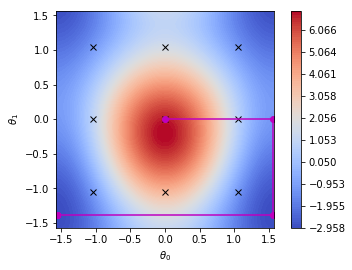

In [17]:
import matplotlib.pyplot as plt
levels = np.linspace(np.min(O), np.max(O), 100)
plt.clf()
plt.contourf(params[0], params[1], O, levels, cmap=plt.get_cmap('coolwarm'))
plt.plot(T[0], T[1], 'kx')
plt.plot(params_opt[0], params_opt[1], 'm-o')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.axis('square')
plt.colorbar()
plt.show()